In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Load the data using pandas
file_path = 'cluster_new_raw_test.csv'
df = pd.read_csv(file_path)

# Drop unnecessary column
df.drop(columns=['id'], inplace=True)

# Show first few rows
df.head()

# Check the distribution of target variable
y = df['Cluster']
y.value_counts()

# Define target column and features
target_column = 'Cluster'
X = df.drop(columns=[target_column])
y = df[target_column]

# Apply standardization (scaling) to the features
scaler = StandardScaler()  # Create the StandardScaler object
X = scaler.fit_transform(X)  # Apply scaling

# Split the data into train and test (using sklearn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear', multi_class='ovr')

# Training loop with batch processing
batch_size = 3000
n_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size != 0 else 0)

for batch_idx in tqdm(range(n_batches), desc="Training Batches", unit="batch"):
    # Get the start and end indices for this batch
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(X_train))

    # Slice the training data for this batch
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]

    # Train on this batch
    model.fit(X_batch, y_batch)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


Training Batches: 100%|██████████| 113/113 [00:00<00:00, 345.65batch/s]

Final Model Accuracy: 0.9022



Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     60253
           1       0.90      0.89      0.89     52565

    accuracy                           0.90    112818
   macro avg       0.90      0.90      0.90    112818
weighted avg       0.90      0.90      0.90    112818



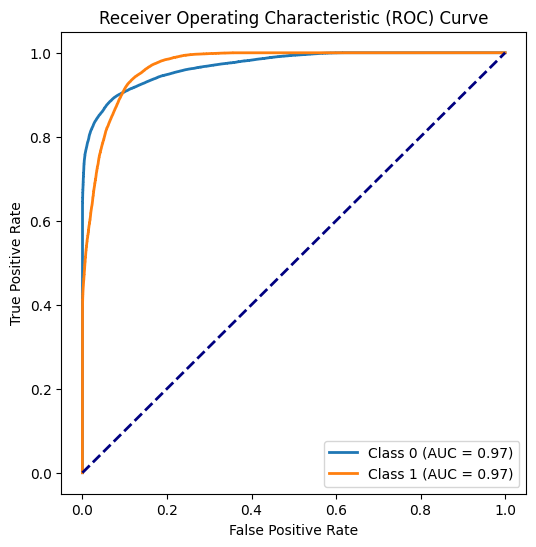

In [3]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
# Plot ROC curve
# For multi-class classification, we need to compute ROC curve for each class
# and then compute the AUC score.
# Get predicted probabilities for each class
y_prob = model.predict_proba(X_test)
# Define the number of classes
n_classes = len(y.unique())
# Create a plot for ROC curve
plt.figure(figsize=(6, 6))
# For each class, calculate ROC curve and AUC
for i in range(n_classes):
    # Get the true binary labels and predicted probabilities for class `i`
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for this class
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()